# Introduction to Linear Regression
## Module 1, Lab 1: Understanding Linear Regression

Linear regression is one of the most fundamental algorithms in machine learning. In this lab, you will learn how to implement and understand linear regression from the ground up.

### Learning Objectives
- Understand the mathematical foundation of linear regression
- Implement linear regression using scikit-learn
- Evaluate model performance using appropriate metrics
- Visualize the relationship between features and target variables

### Business Problem
We will predict house prices based on various features like size, location, and number of bedrooms. This is a classic regression problem that helps understand how different factors influence property values.

## Setup
### Installing and Importing Libraries
First, we need to install the necessary libraries for our analysis.

In [1]:
# Install required packages
!pip install --upgrade pip
!pip install pandas numpy matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 2.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 19.0 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\rouge\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
%matplotlib inline

## Loading and Exploring the Data
We'll use the Boston Housing dataset, which is a classic dataset for regression problems.

In [3]:
# Create a synthetic housing dataset since Boston Housing has ethical concerns
np.random.seed(42)
n_samples = 500

# Generate synthetic features
size = np.random.normal(2000, 500, n_samples)  # House size in sq ft
bedrooms = np.random.randint(1, 6, n_samples)  # Number of bedrooms
age = np.random.randint(1, 50, n_samples)      # Age of house
location_score = np.random.uniform(1, 10, n_samples)  # Location desirability score

# Generate target variable (price) with realistic relationships
price = (size * 150 + bedrooms * 10000 - age * 500 + location_score * 5000 + 
         np.random.normal(0, 20000, n_samples))

# Create DataFrame
df = pd.DataFrame({
    'size': size,
    'bedrooms': bedrooms,
    'age': age,
    'location_score': location_score,
    'price': price
})

# Ensure positive prices
df['price'] = np.maximum(df['price'], 50000)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (500, 5)


,size,bedrooms,age,location_score,price
0,2248.357077,2,10,5.084106,403433.740314
1,1930.867849,2,30,3.124454,301796.209041
2,2323.844269,3,25,1.661471,379597.250650
3,2761.514928,3,39,2.527821,409356.185754
4,1882.923313,5,20,5.677966,365225.070398


## Exploratory Data Analysis
Let's explore our dataset to understand the relationships between variables.

In [4]:
# Basic statistics
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            500 non-null    float64
 1   bedrooms        500 non-null    int32  
 2   age             500 non-null    int32  
 3   location_score  500 non-null    float64
 4   price           500 non-null    float64
dtypes: float64(3), int32(2)
memory usage: 15.8 KB
None

Basic Statistics:
              size    bedrooms         age  location_score          price
count   500.000000  500.000000  500.000000      500.000000     500.000000
mean   2003.418997    2.966000   24.932000        5.503659  345300.690897
std     490.626624    1.422988   13.946914        2.604610   79824.277592
min     379.366330    1.000000    1.000000        1.044460   87841.280856
25%    1649.846298    2.000000   13.000000        3.148940  287303.779854
50%    2006.398573    3.000000   25.000000      

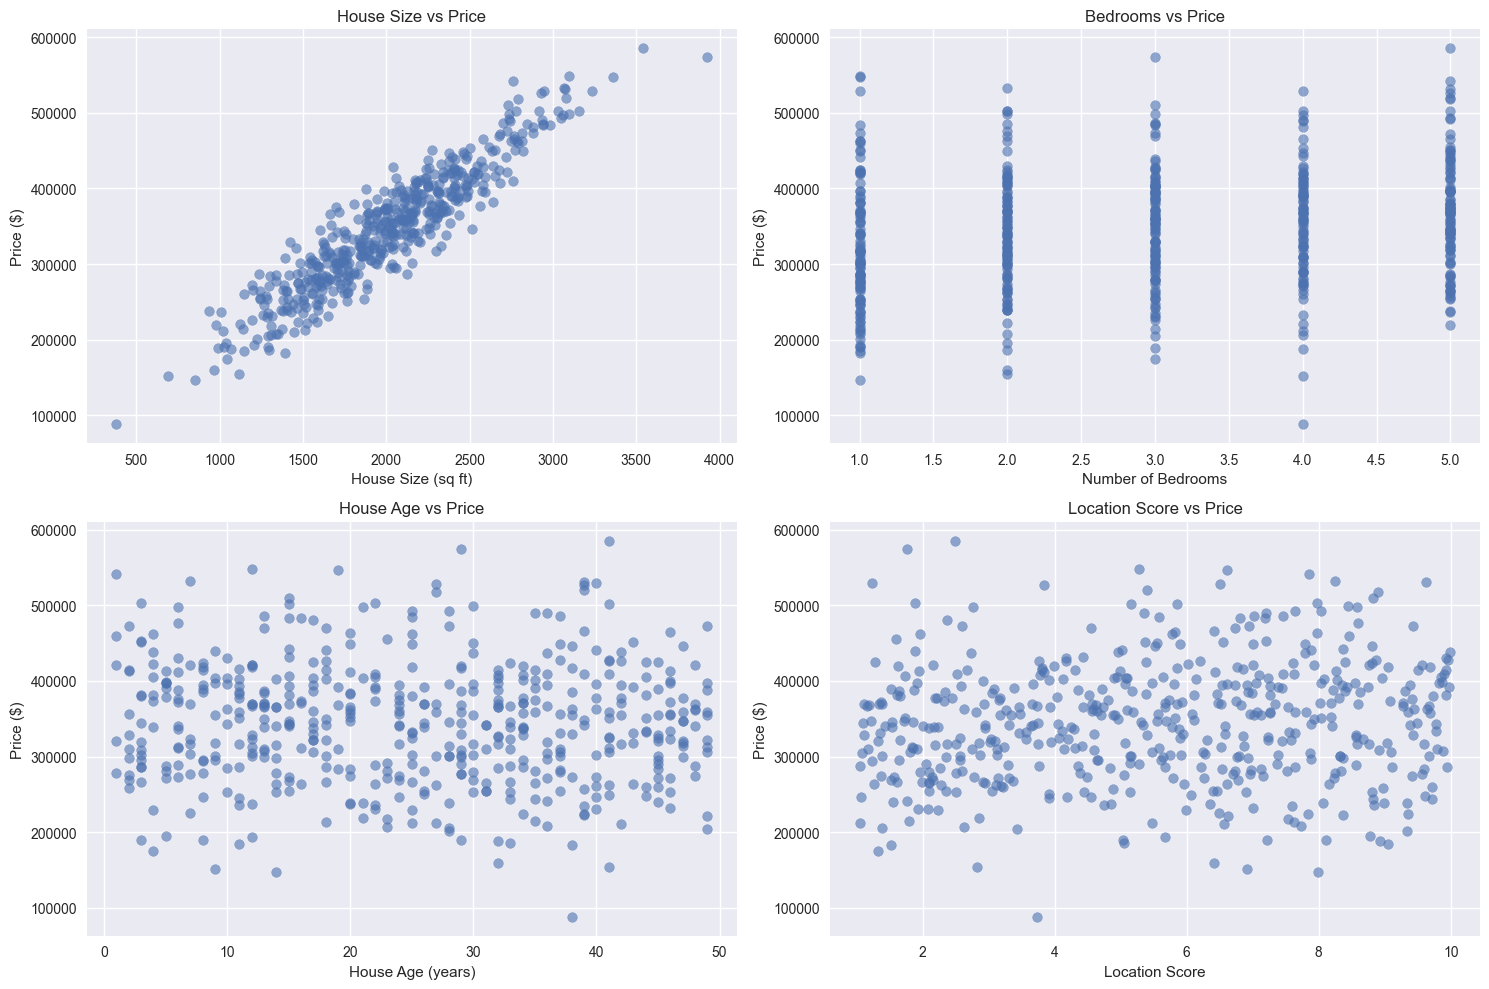

In [5]:
# Visualize the relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Size vs Price
axes[0, 0].scatter(df['size'], df['price'], alpha=0.6)
axes[0, 0].set_xlabel('House Size (sq ft)')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('House Size vs Price')

# Bedrooms vs Price
axes[0, 1].scatter(df['bedrooms'], df['price'], alpha=0.6)
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Bedrooms vs Price')

# Age vs Price
axes[1, 0].scatter(df['age'], df['price'], alpha=0.6)
axes[1, 0].set_xlabel('House Age (years)')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('House Age vs Price')

# Location Score vs Price
axes[1, 1].scatter(df['location_score'], df['price'], alpha=0.6)
axes[1, 1].set_xlabel('Location Score')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Location Score vs Price')

plt.tight_layout()
plt.show()

## Building the Linear Regression Model
Now let's build our linear regression model step by step.

In [6]:
# Prepare features and target
X = df[['size', 'bedrooms', 'age', 'location_score']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 400
Test set size: 100


In [7]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Model trained successfully!")

Model trained successfully!


## Model Evaluation
Let's evaluate how well our model performs.

In [8]:
# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Model Performance:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Training RMSE: ${np.sqrt(train_mse):,.2f}")
print(f"Test RMSE: ${np.sqrt(test_mse):,.2f}")
print(f"Training MAE: ${train_mae:,.2f}")
print(f"Test MAE: ${test_mae:,.2f}")

Model Performance:
Training R² Score: 0.9396
Test R² Score: 0.9178
Training RMSE: $19,701.89
Test RMSE: $22,348.35
Training MAE: $15,636.43
Test MAE: $17,811.62


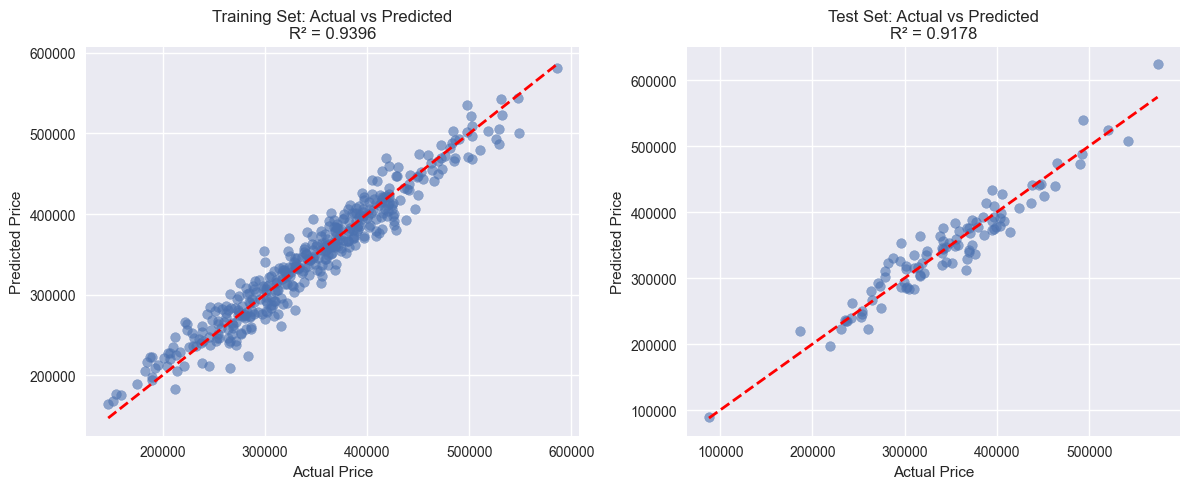

In [9]:
# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

## Understanding the Model Coefficients
Let's examine what our model learned about the relationship between features and house prices.

In [10]:
# Display model coefficients
feature_names = X.columns
coefficients = model.coef_
intercept = model.intercept_

print("Linear Regression Equation:")
print(f"Price = {intercept:.2f}", end="")
for name, coef in zip(feature_names, coefficients):
    print(f" + ({coef:.2f} × {name})", end="")
print("\n")

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (by coefficient magnitude):")
print(coef_df)

Linear Regression Equation:
Price = -7225.96 + (154.83 × size) + (10130.38 × bedrooms) + (-544.76 × age) + (4679.75 × location_score)

Feature Importance (by coefficient magnitude):
          Feature   Coefficient  Abs_Coefficient
1        bedrooms  10130.375435     10130.375435
3  location_score   4679.746399      4679.746399
2             age   -544.761655       544.761655
0            size    154.830612       154.830612


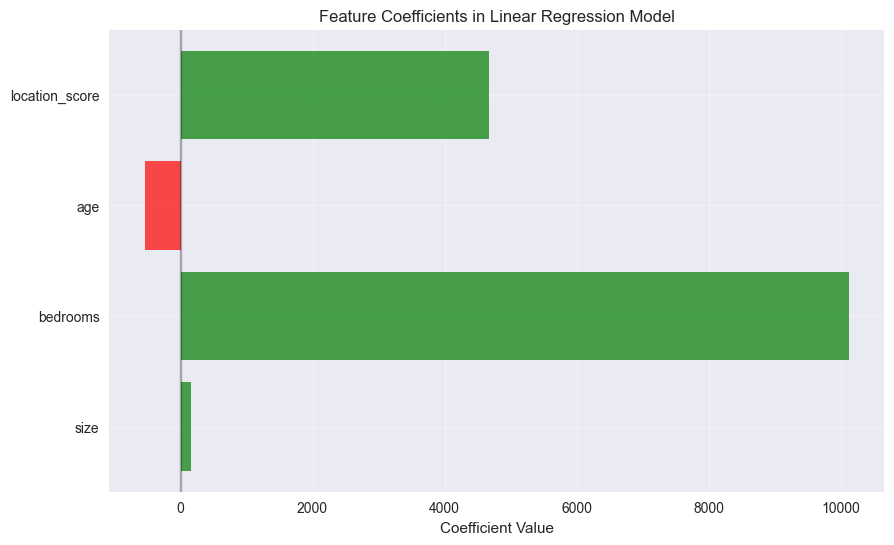

In [11]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients]
plt.barh(feature_names, coefficients, color=colors, alpha=0.7)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression Model')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()

## Challenge: Make Predictions
Now it's your turn! Use the trained model to make predictions for new houses.

In [12]:
# Challenge: Predict prices for these houses
new_houses = pd.DataFrame({
    'size': [1800, 2500, 1200],
    'bedrooms': [3, 4, 2],
    'age': [10, 5, 25],
    'location_score': [8.5, 9.2, 6.0]
})

# TODO: Use the model to predict prices for these houses
# predictions = model.predict(new_houses)

# Uncomment the lines below after making predictions
# for i, price in enumerate(predictions):
#     print(f"House {i+1}: ${price:,.2f}")

print("Houses to predict:")
print(new_houses)

Houses to predict:
   size  bedrooms  age  location_score
0  1800         3   10             8.5
1  2500         4    5             9.2
2  1200         2   25             6.0


## Summary

In this lab, you learned:

1. **Linear Regression Fundamentals**: How linear regression works and when to use it
2. **Data Preparation**: Loading, exploring, and preparing data for modeling
3. **Model Training**: Using scikit-learn to train a linear regression model
4. **Model Evaluation**: Using metrics like R², RMSE, and MAE to assess performance
5. **Model Interpretation**: Understanding coefficients and feature importance

### Key Takeaways:
- Linear regression assumes a linear relationship between features and target
- The model learns coefficients that represent the impact of each feature
- R² score tells us how much variance in the target is explained by our features
- Always evaluate on unseen test data to assess generalization

### Next Steps:
- Try feature engineering (polynomial features, interactions)
- Explore regularization techniques (Ridge, Lasso)
- Learn about other regression algorithms (Decision Trees, Random Forest)